Saurav J. Sharma

sharmasauravj@gmail.com

Batch: DW29

**Problem Statement**
You are working for a new-age insurance company and employ
mutiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective way to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train_1.csv")

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


Checking the features present in dataset, number of rows and columns and datatype of the dataset.

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
df.shape

(45211, 11)

In [7]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values in our dataset

Now let's look at our target variable 'y' first. It is catagorical variable. We'll see it's distribution.

In [10]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
# See the % distribution of the "y"
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### Target Variable Plot Analysis

<Axes: >

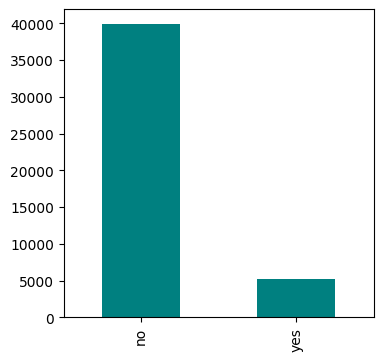

In [12]:
# Bar plot of freequencies
df['y'].value_counts().plot.bar(figsize = (4,4),color = "teal")

## EDA

### Features Plot Analysis

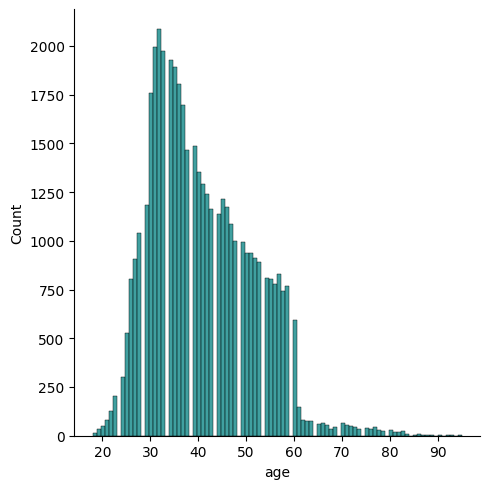

In [13]:
sns.displot(df["age"], color = "teal")

Now, We can infer that most of the clients fall in the age group between 20-60.

<Axes: >

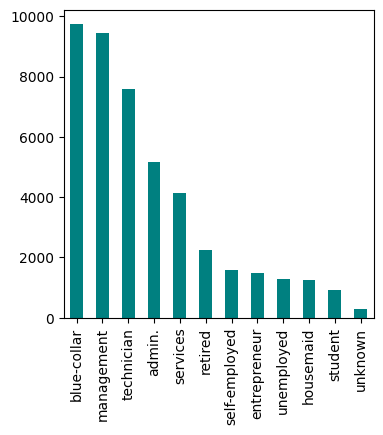

In [14]:
df["job"].value_counts().plot.bar(color = "teal", figsize = (4,4))

<Axes: >

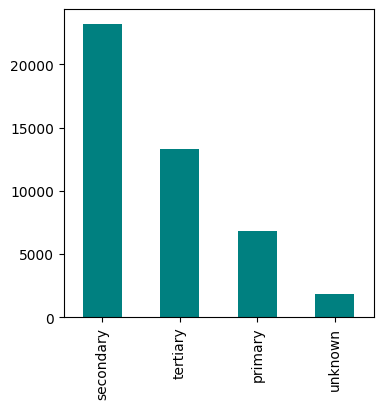

In [15]:
df["education_qual"].value_counts().plot.bar(color = "teal", figsize = (4,4))

We can see that most of our clients have secondary or tertiary level of education.

### Feature vs Target Plot Analysis

In [16]:
print(pd.crosstab(df["job"], df["y"]))

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


Text(0, 0.5, 'percentage')

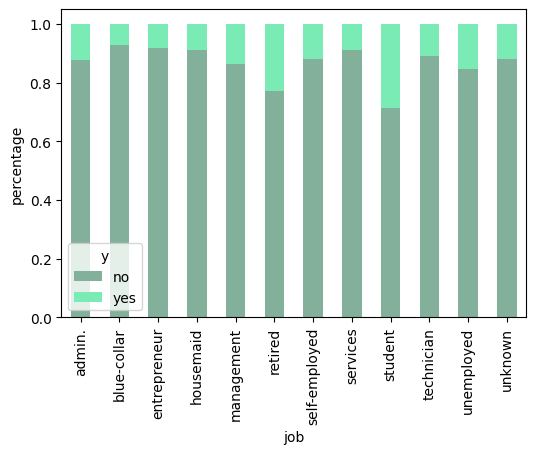

In [17]:
job = pd.crosstab(df["job"], df["y"])
job.div(job.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (6,4), color=['#82b09a', '#7aebb4'])
plt.xlabel("job")
plt.ylabel("percentage")

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit.

Next, let's explore the 'education_qual' variable against the 'y' variable.

y                  no   yes
education_qual             
primary          6260   591
secondary       20752  2450
tertiary        11305  1996
unknown          1605   252


Text(0, 0.5, 'percentage')

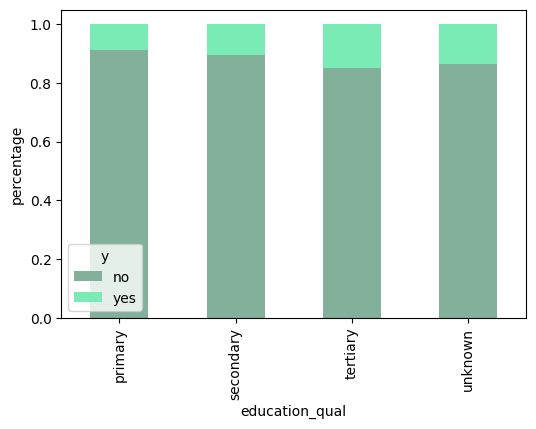

In [18]:
print(pd.crosstab(df["education_qual"],df["y"]))
education_qual = pd.crosstab(df["education_qual"], df["y"])
education_qual.div(education_qual.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True, figsize = (6,4), color=['#82b09a', '#7aebb4'])
plt.xlabel("education_qual")
plt.ylabel("percentage")

We can infer that clients having education_qual : tertiary and unknown have slightly higher chances of subscribing to a insurance policy as compared to the other clients.

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


Text(0, 0.5, 'percentage')

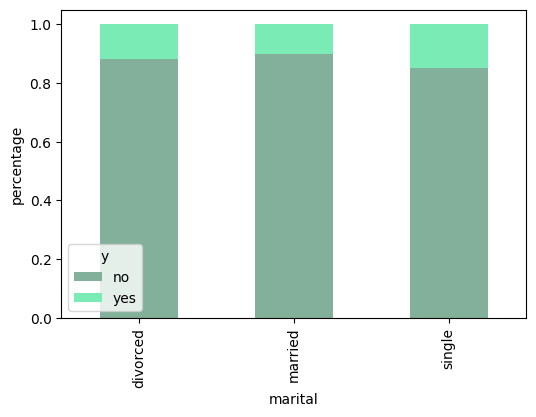

In [19]:
print(pd.crosstab(df["marital"], df["y"]))
marital = pd.crosstab(df["marital"], df["y"])
marital.div(marital.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (6,4), color=['#82b09a', '#7aebb4'])
plt.xlabel("marital")
plt.ylabel("percentage")


Here, We can see that singles and divorced clients are likely to more subscribed to insurance policy than married clients.

Now let's look at how correlated our numerical features are. We will see the correlation between each of these features and the feature which have high negative or positive values are correlated. By this we can get an overview of the feature which might affect our target variable. We will convert our target variable into numeric values first.

In [20]:
df["y"].replace("no", 0, inplace = True)
df["y"].replace("yes", 1, inplace = True)

<Axes: >

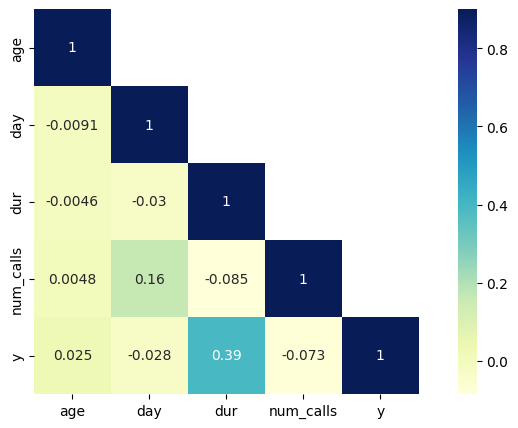

In [21]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [22]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no missing values in the dataset.

### Encoding the data: One hot encoding

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We'll apply dummies. We will also remove the target variable and keep it in a separate variable.

In [23]:
target = df['y']
df = df.drop('y',1)

Applying dummies on dataset.

In [24]:
df = pd.get_dummies(df)

## **Model Building**


We will split the data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 25% data as validation set and rest as the training set.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size = 0.25, random_state=7)

Now our data is ready. For classification problem we gonna use Logistic Regression Model. Let's build the model.

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lreg = LogisticRegression()

In [29]:
#Fitting the model into our data
lreg.fit(X_train, Y_train)

LogisticRegression()

In [30]:
L_pred = lreg.predict(X_test)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is AUC-ROC, let's calculate the accuracy on test set.

In [31]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [32]:
print("Accuracy Score of Logistic Reg:",round(accuracy_score(Y_test, L_pred),2))

Accuracy Score of Logistic Reg: 0.9


In [33]:
L_AUC_ROC = roc_auc_score(Y_test, L_pred)
print("ROC AUC Score of Logistic Reg:",round((L_AUC_ROC),2))

ROC AUC Score of Logistic Reg: 0.65


Here for better ROC AUC SCORE we'll use Decision Tree Classifier Model. It do not have liniarity bound so let's see what we will get if our data have non linearity?

### Decision Tree Classifier

In [34]:
 from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc = DecisionTreeClassifier(random_state = 0, splitter = "best")

In [36]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
D_pred = dtc.predict(X_test)

In [38]:
print("Accuracy score of Decision Tree Cl:",round(accuracy_score(Y_test, D_pred),1))

Accuracy score of Decision Tree Cl: 0.9


In [39]:
D_AUC_ROC = roc_auc_score(Y_test, D_pred)
print("ROC_AUC_Score of Decision Tree Cl:",round(D_AUC_ROC, 2))

ROC_AUC_Score of Decision Tree Cl: 0.7


### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
KNN = KNeighborsClassifier()

In [42]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [43]:
K_pred = KNN.predict(X_test)

In [44]:
print("Accuracy score of KNeighbors Cl:",round(accuracy_score(Y_test, K_pred), 2))

Accuracy score of KNeighbors Cl: 0.88


In [45]:
K_AUC_ROC = roc_auc_score(Y_test, K_pred)
print("ROC_AUC_Score of KNeighbors Cl:",round(K_AUC_ROC, 2))

ROC_AUC_Score of KNeighbors Cl: 0.59


**Conclusion:**

As our evalution metrix is AUROC. Here, we can see that our Decision Tree Classifier Model have ROC AUC Score of 0.7 and as well as Accuracy Score around 0.9.

So, We will use Desicion Tree Model and it will predict output as much as 70% good. So model's predicted output data will help our company's employees to target, agreeable clients more effectively and convert them into happy customer. So it will save time of employees as well as the company.

In the end this predictions will help company to run time saver and cost effective tele marketing campaigns with better customer conversion ratio.

We can also design campaign where: employees will connect to prospect clients first, from the predicted output and successfully sell them term insurance.